## Observations and Insights

1. In this study, we can see that the mice under the Capomulin treatment were the second to maintain a small tumor size in average in comparison with other treatments. Keeping a size of 41 mm3 among 230 observations is quite interesting and consistent that reflects the efficiency of the treatment.

2. The study was performed in a slighlty more number of male (50.2%) than female (49.8%).

3. The Capomulin treatment results show a consistent effect throughout the study, making it more reliable in comparisson with other treatments.

4. Typically the mice with the Capomulin treatment showed a tumor size ranging from 38 to 43 mm3, which is good compared with other treatments that reached sizes over 50 mm3. Only in two cases for this treatment tumors grew less than 30 mm, but we need to investigate further why that happened.

5. Four individual cases with the capomulin treatment showed that after 45 days under observation the tumor decreased up to 30% and all of them remained around 30 mm3.

6. Interestingly, it seems there is an important factor that determines the size of the tumor: the weight. We saw that the more weight the mouse gains, the bigger the tumor may get. We could dig further into this to make the treatment more effcient.

7. We need topay attention to our competitor Ramicane. It has got similar results in terms of efficiency in the same timeframe.

## Dependencies and starter code

In [1]:
# ===============================================
# Paolo Vega
# Bootcamp Data Analytics
# Version   1.0.0 03/20/2020
#           1.0.1 03/21/2020
#           1.0.2 03/22/2020
#           1.0.3 03/23/2020
#           1.0.4 03/24/2020
# ===============================================

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata,study_results, how="outer",on="Mouse ID")

## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_regimen = mouse_results.groupby(by=["Drug Regimen"]).agg(meanTV = ("Tumor Volume (mm3)","mean"),
                                               medianTV = ("Tumor Volume (mm3)","median"),
                                                varTV = ("Tumor Volume (mm3)","var"),
                                               stdTV = ("Tumor Volume (mm3)",np.std),
                                               semTV = ("Tumor Volume (mm3)",st.sem),
                                                countTV = ("Tumor Volume (mm3)","count")
                                               )

# Order values according to variance
summary_regimen.sort_values(by="varTV", ascending=False, inplace=True)

print("Summary data for the study")
# Apply some formatting to the output of the Summary Table per Regimen
summary_regimen.style.format({"meanTV":"{:,.2f}",
                             "medianTV":"{:,.2f}",
                             "varTV":"{:,.2f}",
                             "stdTV":"{:,.2f}",
                             "semTV":"{:,.2f}"})

Summary data for the study


,meanTV,medianTV,varTV,stdTV,semTV,countTV
Drug Regimen,,,,,,
Ketapril,55.24,53.70,68.55,8.28,0.60,188
Naftisol,54.33,52.51,66.17,8.13,0.60,186
Placebo,54.03,52.29,61.17,7.82,0.58,181
Stelasyn,54.23,52.43,59.45,7.71,0.57,181
Zoniferol,53.24,51.82,48.53,6.97,0.52,182
Infubinol,52.88,51.82,43.13,6.57,0.49,178
Propriva,52.32,50.85,42.35,6.51,0.51,161
Ceftamin,52.59,51.78,39.29,6.27,0.47,178
Capomulin,40.68,41.56,24.95,4.99,0.33,230


## Bar plots

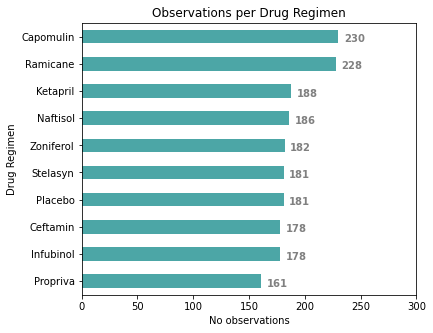

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_reg = summary_regimen["countTV"].sort_values(ascending=True)

fig, ax = plt.subplots()
drug_reg.plot(kind="barh", align="center", color="teal", alpha=0.7, figsize=(6,5))
plt.title("Observations per Drug Regimen")
plt.ylabel("Drug Regimen")
plt.xlabel("No observations")
plt.xlim(0,300)

#Add data labels to graph
for i, value in enumerate(drug_reg):
    ax.text(value + 5, i - 0.2, str(value), color='grey', fontweight='bold')

plt.show()

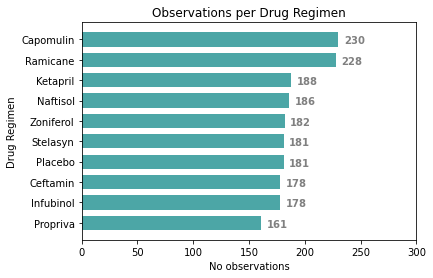

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = summary_regimen["countTV"].sort_values(ascending=True)
y_pos = np.arange(len(counts))

#Get the axis for the plot
fig, ax = plt.subplots()
ax.barh(y_pos,counts, height=0.7, align="center", color="teal", alpha=0.7)
plt.yticks(y_pos,summary_regimen["countTV"].sort_values(ascending=True).index)
plt.title("Observations per Drug Regimen")
plt.ylabel("Drug Regimen")
plt.xlabel("No observations")
plt.xlim(0,300)

#Add data labels to graph
for i, value in enumerate(counts):
    ax.text(value + 5, i - 0.2, str(value), color='grey', fontweight='bold')

plt.show()


## Pie plots

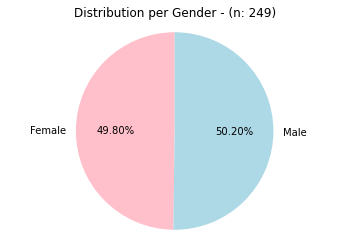

In [15]:
# Get unique count pere mouse in the data
mouse_gender = mouse_results.groupby(by=["Sex","Mouse ID"],as_index=False).max()
# Get the number of actual mice per gender
mouse = mouse_gender.groupby("Sex")["Mouse ID"].count()
mouse.plot(kind="pie", autopct="%1.2f%%",startangle=90, colors = ["pink", "lightblue"])
plt.title(f"Distribution per Gender - (n: {sum(mouse)})")
plt.ylabel("")
plt.axis("equal")
plt.show()

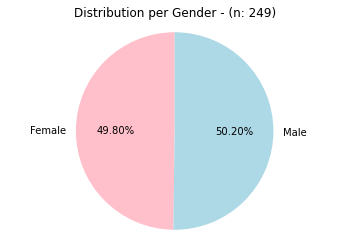

In [16]:
# Generate a new table without index to access its columns
mouse = mouse_gender.groupby("Sex", as_index=False)["Mouse ID"].count()
x_labels = [x for x in mouse["Sex"]]
y_values= mouse["Mouse ID"]
colors = ["pink", "lightblue"]
plt.pie(y_values, labels = x_labels, colors = colors, autopct="%1.2f%%", startangle=90)
plt.axis("equal")
plt.title(f"Distribution per Gender - (n: {sum(y_values)})")
plt.show()

## Quartiles, outliers and boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Find information about the 4 regimens
for regime in regimens:
    print("=============================================")
    print(f"Information about {regime}")
    # get the data for the current regimen
    data_for_regime = mouse_results.loc[(mouse_results["Drug Regimen"] == regime)]
    # calculate the quantiles, whiskers and set values to detect potential outliers
    print("Establishing quantiles...")
    quantiles = data_for_regime["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq - lowerq
    print("Setting whiskeres and oiter bounds...")
    uwhisker = upperq + (1.5 * iqr)
    lwhisker = lowerq - (1.5 * iqr)
    print("Searching for outliers...")
    # Search potential outliers
    outliers = data_for_regime.loc[(data_for_regime["Tumor Volume (mm3)"] < lwhisker) |
                                  (data_for_regime["Tumor Volume (mm3)"] > uwhisker)]

    # Validate if there is any outlier
    if len(outliers) > 0:
        if len(outliers) > 1:
            print(f"The outliers are: {len(outliers)}")
        else:
            print(f"The outlier is: {len(outliers)}")
        display(outliers)
    else:
        print("There are no potential outliers :)")


Information about Capomulin
Establishing quantiles...
Setting whiskeres and oiter bounds...
Searching for outliers...
The outliers are: 2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Information about Ramicane
Establishing quantiles...
Setting whiskeres and oiter bounds...
Searching for outliers...
The outlier is: 1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1


Information about Infubinol
Establishing quantiles...
Setting whiskeres and oiter bounds...
Searching for outliers...
There are no potential outliers :)
Information about Ceftamin
Establishing quantiles...
Setting whiskeres and oiter bounds...
Searching for outliers...
There are no potential outliers :)


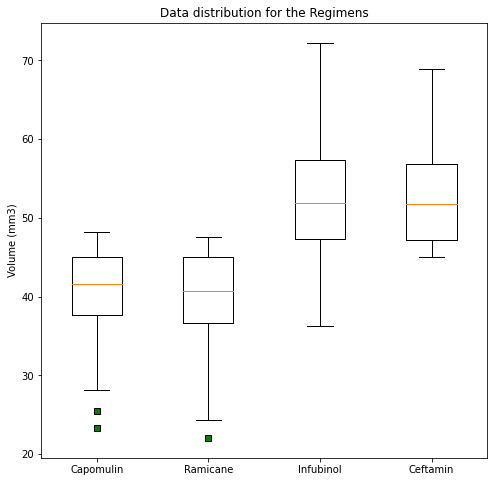

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_square = dict(markerfacecolor='g', marker='s')
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
y_values=[]

# Plot each regimen
for reg in regimens:
    # Filter the data
    temp = mouse_results.loc[mouse_results["Drug Regimen"] == reg,["Tumor Volume (mm3)"]]
    y_values.append(temp["Tumor Volume (mm3)"])

# plot the data in a single boxplot
fig, ax = plt.subplots(figsize=(8,8))
ax.boxplot(y_values,flierprops=green_square)
ax.set_title("Data distribution for the Regimens")
plt.ylabel("Volume (mm3)")
plt.xlabel("")
ax.set_xticklabels(regimens)


plt.show()

## Line and scatter plots

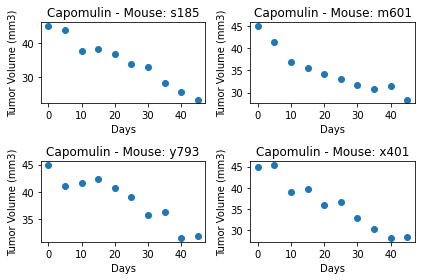

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Establish search criteria
regimen = "Capomulin"
mice = ["s185","m601","y793","x401"]
i = 221
for mouse in mice:
    capomulin_mouse = mouse_results.loc[((mouse_results["Drug Regimen"] == regimen)) 
                                    & (mouse_results["Mouse ID"]== mouse),
                                   ["Timepoint","Tumor Volume (mm3)"]]
    plt.subplot(i)
    plt.scatter(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
    plt.title(f"{regimen} - Mouse: {mouse}")
    plt.xlabel("Days")
    plt.ylabel("Tumor Volume (mm3)")
    i+=1
plt.tight_layout()
plt.show()

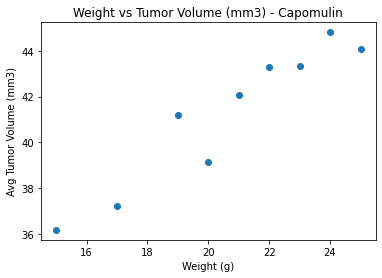

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_mouse_avg = mouse_results.loc[((mouse_results["Drug Regimen"] == regimen)),["Weight (g)","Tumor Volume (mm3)"]]
capomulin_mouse_avg = capomulin_mouse_avg.groupby(by="Weight (g)", as_index=False).mean()
plt.scatter(capomulin_mouse_avg["Weight (g)"], capomulin_mouse_avg["Tumor Volume (mm3)"])
plt.title("Weight vs Tumor Volume (mm3) - Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")


plt.show()

In [39]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
# for the Capomulin regimen
corr, _ = st.pearsonr(capomulin_mouse_avg["Weight (g)"], capomulin_mouse_avg["Tumor Volume (mm3)"])
print(f" The correlation is: {corr}")

 The correlation is: 0.9505243961855269


In [25]:
# Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_mouse_avg["Weight (g)"], 
                                                           capomulin_mouse_avg["Tumor Volume (mm3)"])
# y = mx + b
y_values = []
for weight in capomulin_mouse_avg["Weight (g)"]:
    regress_value = (slope * weight) + intercept
    y_values.append(regress_value)

equation = f" y = {str(round(slope,2))}*x + {str(round(intercept,2))}"
print(f"Equation: {equation}")


Equation:  y = 0.89*x + 22.76


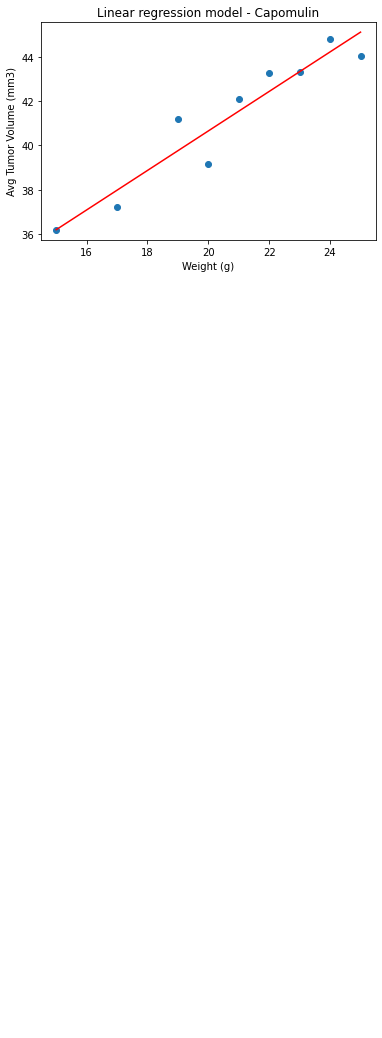

In [26]:
#Plot 
# Create Plot
plt.scatter(x=capomulin_mouse_avg["Weight (g)"], y=capomulin_mouse_avg["Tumor Volume (mm3)"])
# regression
plt.plot(capomulin_mouse_avg["Weight (g)"],y_values,"r-")
plt.title("Linear regression model - Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
# Label plot and annotate the line equation
plt.annotate(equation, (20,0), fontsize = 10, color="blue")
plt.show()